In [ ]:
# 나눔폰트 다운로드 (실행 후 런타임 다시시작!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 교통량 데이터 불러오기 
import pandas as pd

df1 = pd.read_csv('/data/세종시 교통량통계 출근시간(2016-2020) - 세종시 교통량통계 출근시간(2016_2020).csv',encoding='cp949')
df2 = pd.read_csv('/data/세종시 교통량통계 퇴근시간(2016_2020) - 세종시 교통량통계 퇴근시간(2016_2020).csv')
df1

,도로,방향,월자,연도,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
0,갈매로,상행,차로당도로교통량,2016년,0,0,0,0,0,0,0,0,0,0,1284,6001
1,갈매로,상행,평균통행속도,2016년,0,0,0,0,0,0,0,0,0,0,56,56
2,갈매로,상행,점유율,2016년,0,0,0,0,0,0,0,0,0,0,2,1
3,갈매로,하행,차로당도로교통량,2016년,0,0,0,0,0,0,0,0,0,0,680,3118
4,갈매로,하행,평균통행속도,2016년,0,0,0,0,0,0,0,0,0,0,58,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,행복대로,상행,평균통행속도,2020년,0,0,0,0,0,3,9,23,10,5,21,91
572,행복대로,상행,점유율,2020년,0,0,0,0,0,5,5,2,2,1,6,2
573,행복대로,하행,차로당도로교통량,2020년,0,0,0,0,0,0,5,6,9,5,9,79
574,행복대로,하행,평균통행속도,2020년,0,0,0,0,0,0,25,13,18,14,48,99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


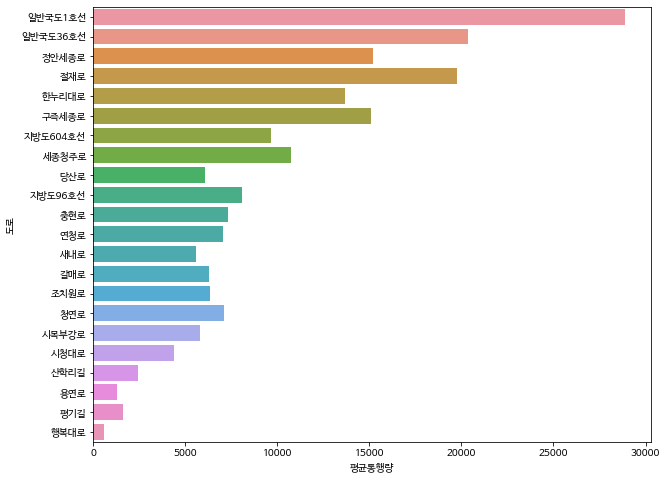

In [ ]:
#출근 (07시~09시)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import seaborn as sns

df_in_tf = df1['월자'] == '차로당도로교통량'
data_in_tf = df1[df_in_tf]

df=data_in_tf.replace(0,np.NaN)
data_in_tf_i=df.mean(skipna=True,axis=1)
data_in_tf_i=data_in_tf_i.astype(int) 

data_in_tf['평균통행량'] = data_in_tf_i
data_in_tf = data_in_tf.sort_values('평균통행량', ascending=False)
data_in_tf

plt.figure(figsize=(10, 8))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(data=data_in_tf,x='평균통행량',y='도로',ci=None)
plt.show()

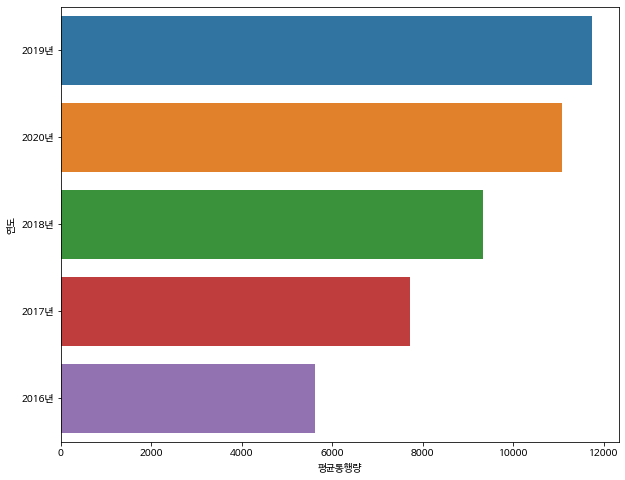

In [ ]:
# 연도별 교통량 분석
plt.figure(figsize=(10, 8))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(data=data_in_tf,x='평균통행량',y='연도',ci=None)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


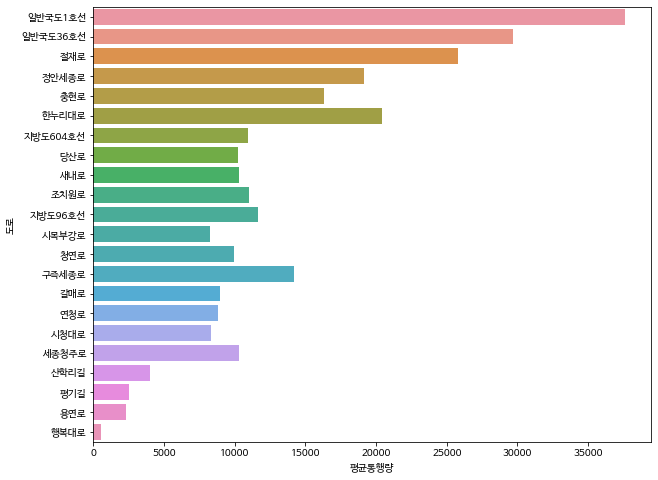

In [ ]:
#퇴근 (17~19시)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import seaborn as sns

df_in_tf = df2['월자'] == '차로당도로교통량'
data_in_tf = df2[df_in_tf]

df=data_in_tf.replace(0,np.NaN)
data_in_tf_i=df.mean(skipna=True,axis=1)
data_in_tf_i=data_in_tf_i.astype(int) 

data_in_tf['평균통행량'] = data_in_tf_i
data_in_tf = data_in_tf.sort_values('평균통행량', ascending=False)
data_in_tf

plt.figure(figsize=(10, 8))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(data=data_in_tf,x='평균통행량',y='도로',ci=None)
plt.show()

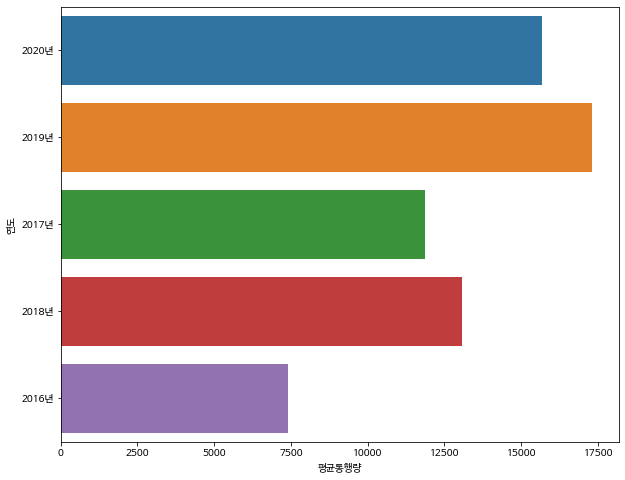

In [ ]:
#퇴근 연도별 교통량 분석
plt.figure(figsize=(10, 8))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(data=data_in_tf,x='평균통행량',y='연도',ci=None)
plt.show()